<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Load data</a></span></li></ul></li></ul></li><li><span><a href="#Morissette-vs-Contemporaries" data-toc-modified-id="Morissette-vs-Contemporaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Morissette vs Contemporaries</strong></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Audio-Feature-Analysis" data-toc-modified-id="Audio-Feature-Analysis-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Audio Feature Analysis</a></span></li><li><span><a href="#Timeline-of-release-dates" data-toc-modified-id="Timeline-of-release-dates-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Timeline of release dates</a></span></li><li><span><a href="#get-release-dates" data-toc-modified-id="get-release-dates-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>get release dates</a></span></li><li><span><a href="#Ploting-Timelines" data-toc-modified-id="Ploting-Timelines-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Ploting Timelines</a></span></li><li><span><a href="#Streams" data-toc-modified-id="Streams-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Streams</a></span></li><li><span><a href="#!!!!!!!-Key-exploration" data-toc-modified-id="!!!!!!!-Key-exploration-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>!!!!!!! Key exploration</a></span></li><li><span><a href="#Popularity" data-toc-modified-id="Popularity-1.0.7"><span class="toc-item-num">1.0.7&nbsp;&nbsp;</span><strong>Popularity</strong></a></span></li><li><span><a href="#by-artist" data-toc-modified-id="by-artist-1.0.8"><span class="toc-item-num">1.0.8&nbsp;&nbsp;</span>by artist</a></span></li><li><span><a href="#by-songs" data-toc-modified-id="by-songs-1.0.9"><span class="toc-item-num">1.0.9&nbsp;&nbsp;</span>by songs</a></span></li></ul></li><li><span><a href="#Counts" data-toc-modified-id="Counts-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Counts</a></span></li><li><span><a href="#Genre-Comparison" data-toc-modified-id="Genre-Comparison-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><strong>Genre Comparison</strong></a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Set color for seaborn plots
sns.set(rc={'axes.facecolor':'#191414', 
            'axes.edgecolor': '#ffffff',
            'figure.facecolor':'#191414',
            'grid.color': '#191414',
            'text.color': '#ffffff',
            'ytick.color': '#ffffff',
            'xtick.color': '#ffffff',
            'axes.labelcolor': '#ffffff'
            })

##### Load data

In [3]:
tracks_df = pd.read_csv('data/artist_tracks_data.csv')
# only include songs from selected artists
singers = ["Morissette", "Angeline Quinto", "Sarah Geronimo"]
tracks_df = tracks_df[tracks_df['artist'].isin(singers)]
tracks_df.head()


,artist,album,track_number,id,name,uri,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Angeline Quinto,@LoveAngelineQuinto,1,48pPpT5Xyli4tBCMiy4Zhs,"Para Bang, Para Lang",spotify:track:48pPpT5Xyli4tBCMiy4Zhs,248711,0.651,0.670,0.533,0.000000,0.1740,-5.851,0.0394,90.089,0.447,28
1,Angeline Quinto,@LoveAngelineQuinto,2,12fSfbtn43L2KO6kqqW0rj,'Di Na Tayo,spotify:track:12fSfbtn43L2KO6kqqW0rj,270132,0.292,0.710,0.657,0.000015,0.2360,-5.509,0.0470,139.965,0.425,28
2,Angeline Quinto,@LoveAngelineQuinto,3,6B2UndFWylp4Y93FwADGVb,At Ang Hirap,spotify:track:6B2UndFWylp4Y93FwADGVb,257567,0.843,0.434,0.357,0.000002,0.1690,-8.532,0.0507,129.769,0.140,53
3,Angeline Quinto,@LoveAngelineQuinto,4,0Ba6MOshEq4QBV5qM4X0UZ,Parang Tayo Pero Hindi,spotify:track:0Ba6MOshEq4QBV5qM4X0UZ,226377,0.711,0.527,0.413,0.000000,0.3270,-7.574,0.0320,127.282,0.236,19
4,Angeline Quinto,@LoveAngelineQuinto,5,3Lc6STDL8CQfAY4t8QVZjT,Awit Ng Pag-ibig,spotify:track:3Lc6STDL8CQfAY4t8QVZjT,249939,0.858,0.350,0.283,0.000002,0.0628,-8.120,0.0382,129.872,0.188,18


### **Morissette vs Contemporaries**

In [4]:
# read and process the charts dataset
df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [5]:
artist_df = df[df['artist'].isin(["Morissette", "Angeline Quinto", "Sarah Geronimo"])]
artist_df.head()

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,91,0Dljpp52vCmtXi0E94qjfo,"Maybe This Time - From ""Maybe This Time""",Sarah Geronimo,19821
2017-01-01,177,0JzwzRDkwZr8s1WRfNgUqA,Till I Met You,Angeline Quinto,11649
2017-01-02,85,0Dljpp52vCmtXi0E94qjfo,"Maybe This Time - From ""Maybe This Time""",Sarah Geronimo,23890
2017-01-02,187,0JzwzRDkwZr8s1WRfNgUqA,Till I Met You,Angeline Quinto,13481
2017-01-02,197,1qoXYfWILyuN0EatImGlma,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",Morissette,13094


In [6]:
mini = artist_df[['artist', 'track_name']]
mon_df = artist_df.groupby('track_name')['position'].resample('W').mean().reset_index() #M for month
all = mon_df.merge(mini, on = 'track_name', how = 'left').drop_duplicates().set_index('date')
all['mori_song'] = np.where(all['artist'] == 'Morissette', 'Morissette', 'Others')
all = all.reset_index()
all

,date,track_name,position,artist,mori_song
0,2019-02-17,"214 - Recorded at Kodama Studios, Philippines",98.500000,Sarah Geronimo,Others
1,2019-02-24,"214 - Recorded at Kodama Studios, Philippines",88.000000,Sarah Geronimo,Others
2,2019-03-03,"214 - Recorded at Kodama Studios, Philippines",87.000000,Sarah Geronimo,Others
3,2019-03-10,"214 - Recorded at Kodama Studios, Philippines",99.142857,Sarah Geronimo,Others
4,2019-03-17,"214 - Recorded at Kodama Studios, Philippines",112.285714,Sarah Geronimo,Others
...,...,...,...,...,...
609,2018-08-19,Till I Met You,NaN,Angeline Quinto,Others
610,2018-08-26,Till I Met You,NaN,Angeline Quinto,Others
611,2018-09-02,Till I Met You,NaN,Angeline Quinto,Others
612,2018-09-09,Till I Met You,195.800000,Angeline Quinto,Others


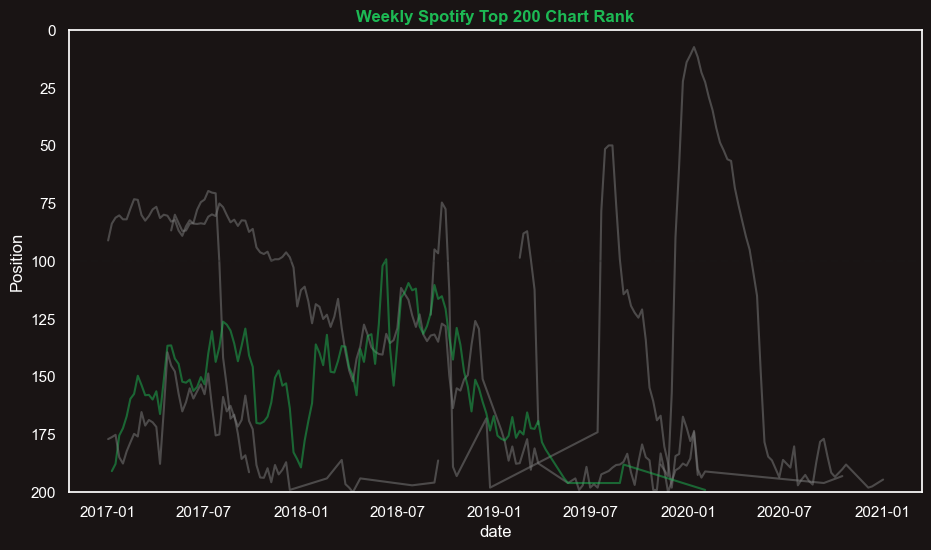

In [7]:
#line chart of monthly streams
fig= plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
# #default is line so you can omit kind= parameter
# all.groupby(['artist', 'track_name']).plot(ax=ax, kind='line')
g = sns.lineplot(data = all, x = 'date', y = 'position', hue = 'track_name', palette = ['#808080', '#808080', '#808080', '#808080', '#808080', '#1DB954','#808080', '#808080', '#808080'], alpha = 0.5)

plt.ylabel('Position')
plt.title('Weekly Spotify Top 200 Chart Rank', weight='bold', color ='#1DB954')
plt.ylim([200,0])
g.axhline(100, linestyle = '--', color = 'k', alpha = 0.2)
ax.get_legend().remove()

##### Audio Feature Analysis

In [8]:
artist = ["Morissette"]
competitors = ["Angeline Quinto", "Sarah Geronimo"]
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']

columns_to_view = ['artist', 'name'] + features

In [9]:
df_features = tracks_df[columns_to_view].copy()

df_features['is_mori'] = ['Morissette' if artist_name in artist else 'Competitors'
                       for artist_name in df_features['artist'].values]

# get max value for normalization
max_tempo = df_features['tempo'].max()
max_loudness = df_features['loudness'].min()

# normalize tempo and loudness
df_features['tempo']= df_features['tempo']/max_tempo
df_features['loudness']= df_features['loudness']/max_loudness

# set multiindex
df_features = df_features.set_index(['name', 'artist', 'is_mori'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
# # reset index
df_features_stacked = df_features_stacked.reset_index()
# # rename level_3
df_features_stacked = df_features_stacked.rename(columns={'level_3': 'feature'})
df_features_stacked

,name,artist,is_mori,feature,value
0,"Para Bang, Para Lang",Angeline Quinto,Competitors,danceability,0.670000
1,"Para Bang, Para Lang",Angeline Quinto,Competitors,energy,0.533000
2,"Para Bang, Para Lang",Angeline Quinto,Competitors,loudness,0.370528
3,"Para Bang, Para Lang",Angeline Quinto,Competitors,speechiness,0.039400
4,"Para Bang, Para Lang",Angeline Quinto,Competitors,acousticness,0.651000
...,...,...,...,...,...
2983,Movie Love,Sarah Geronimo,Competitors,acousticness,0.035400
2984,Movie Love,Sarah Geronimo,Competitors,instrumentalness,0.000000
2985,Movie Love,Sarah Geronimo,Competitors,liveness,0.126000
2986,Movie Love,Sarah Geronimo,Competitors,valence,0.386000


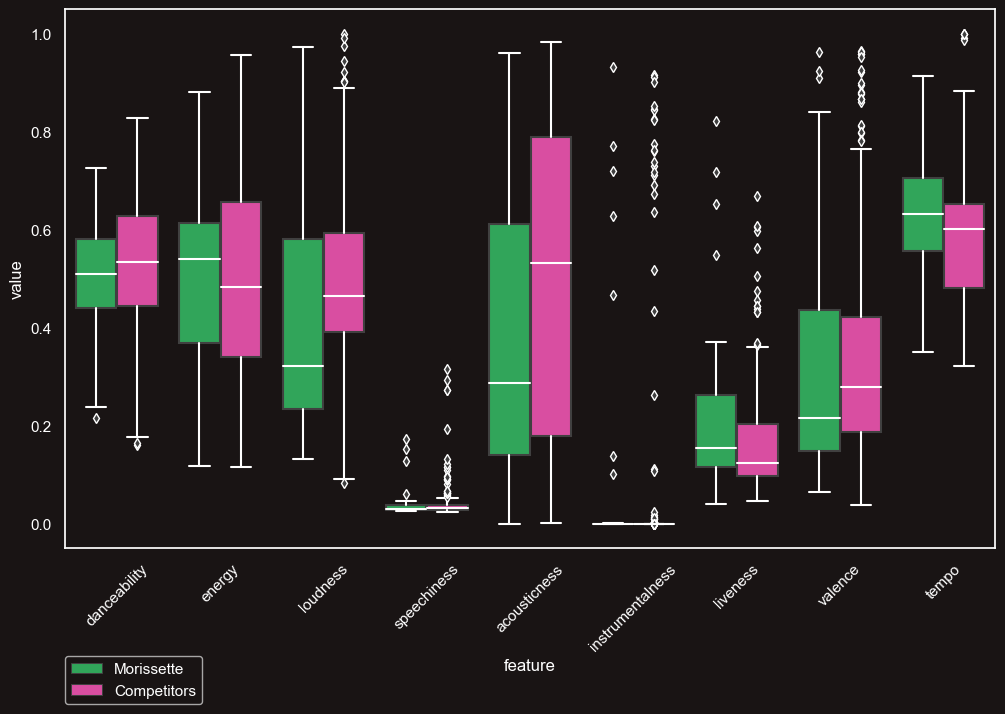

In [10]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y='value',  hue='is_mori', ax=ax,
            hue_order=['Morissette', 'Competitors'], palette=['#1DB954', '#f037a5'],
           capprops=dict(color='white'),
                whiskerprops=dict(color='white'),
                flierprops=dict(color='white', markeredgecolor='white'),
                medianprops=dict(color='white'))

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0)

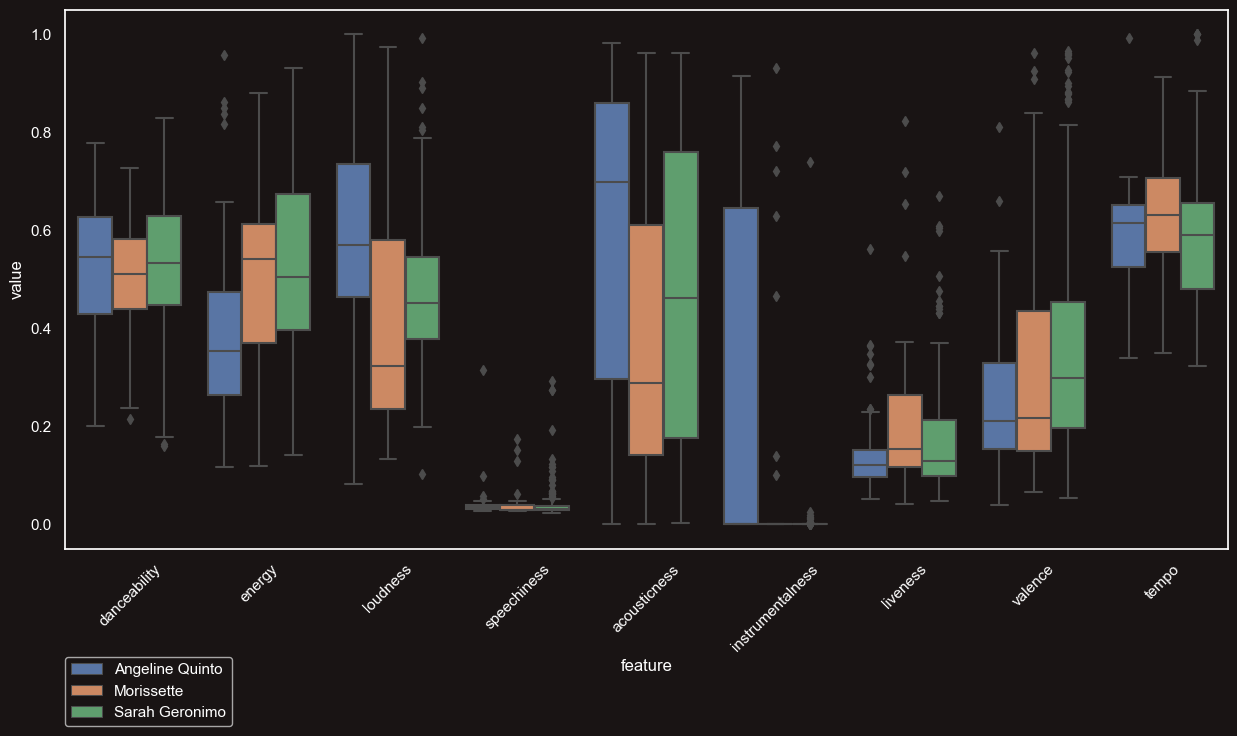

In [11]:
plt.figure(figsize=(15, 7))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y='value',  hue='artist', ax=ax)#,
            # hue_order=['Morissette', 'Competitors'], palette=['pink', 'C7'])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0)

<Figure size 700x300 with 0 Axes>

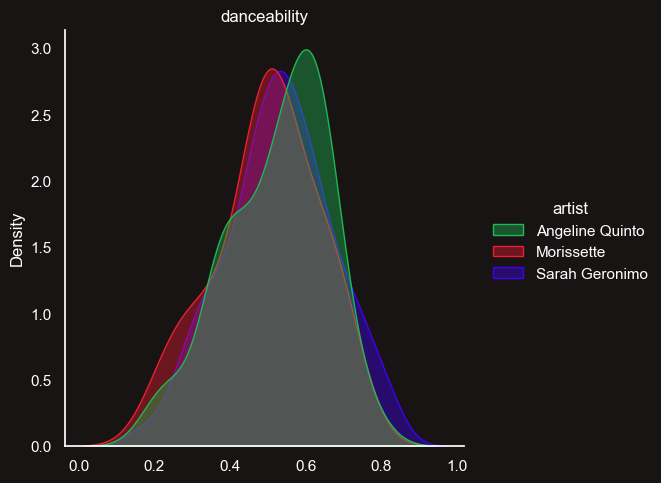

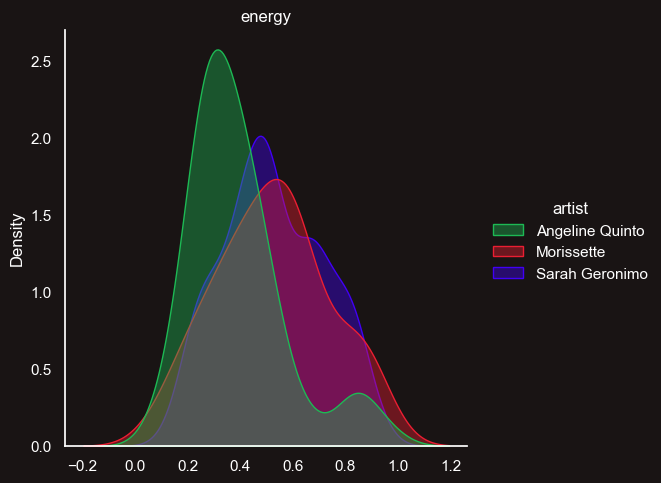

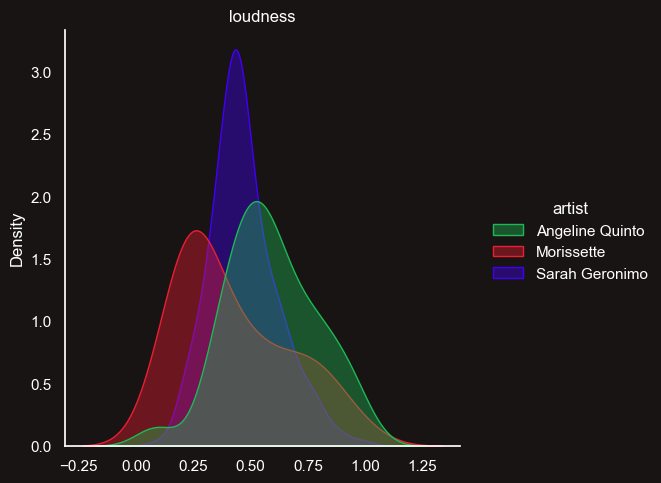

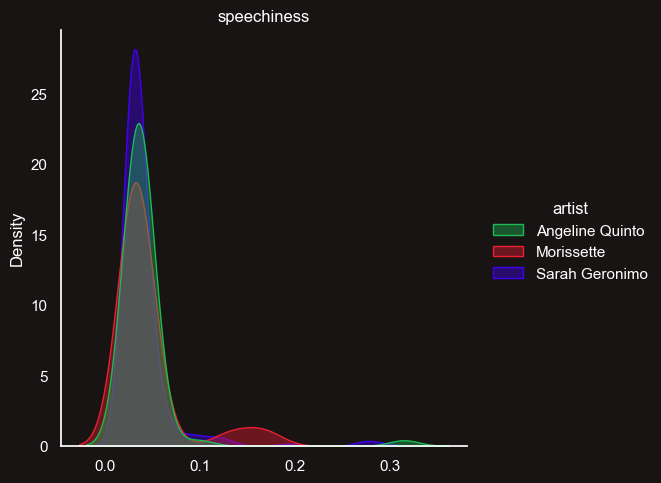

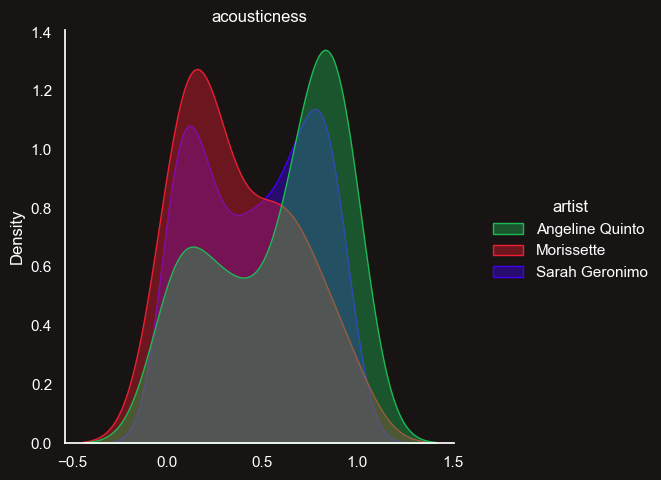

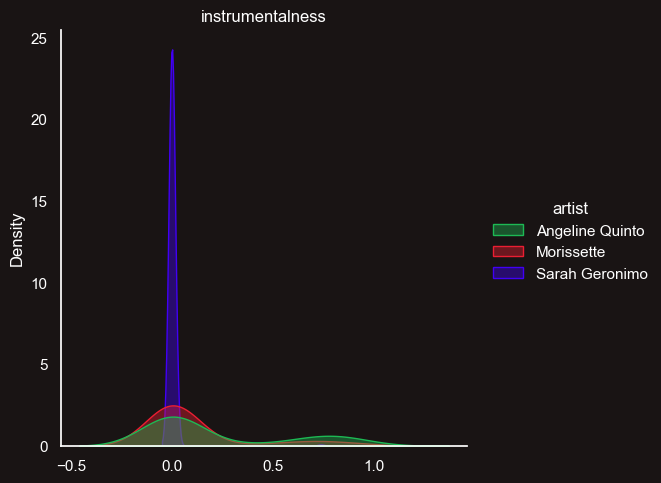

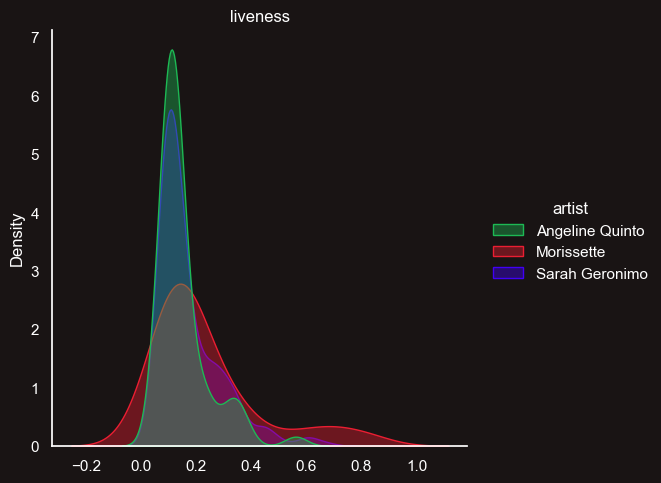

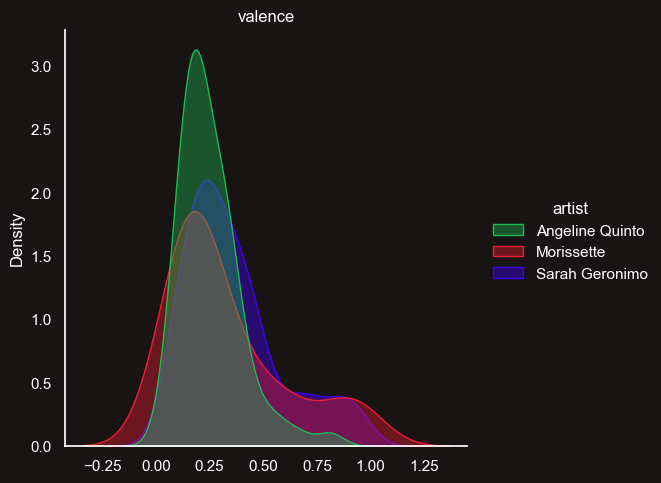

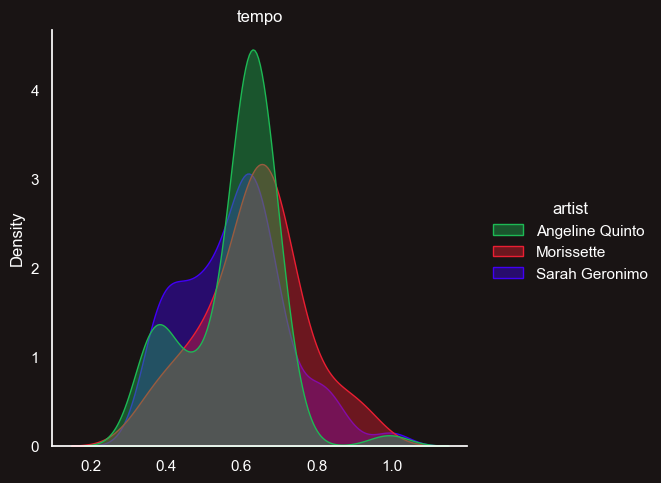

In [12]:
plt.figure(figsize=(7,3))
# fig, ax = plt.subplots(3,3)

# With transparency
for nm in features:
    sns.displot(data=df_features_stacked[df_features_stacked['feature'] == nm], x='value',  
    hue='artist', palette=['#1DB954', '#eb1e32', '#4100F5'], fill=True, common_norm=False, alpha=0.4,
    kind = 'kde').set(title = nm, xlabel = '')
    
    

##### Timeline of release dates

##### get release dates

In [13]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
 
%matplotlib inline  


In [14]:
import numpy as np
import pandas as pd

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import keyring
import time
import os

In [15]:
client_credentials_manager = SpotifyClientCredentials(client_id=keyring.get_password('spotify', 'cid'),
                                                      client_secret=keyring.get_password('spotify', 'secret') )
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [16]:
def get_artist_tracks_data(artist_id, addl_album_ids = []):

    ids = []
    album_mapping = pd.DataFrame()
    artist_albums = sp.artist_albums(artist_id)
    for i in np.arange(0,len(artist_albums['items'])):
        album_id = artist_albums['items'][i]['uri'].rsplit(':',1)[1]
        ids.append(album_id)

        album_info = {
        'album_id' : album_id,
        'album_name' : artist_albums['items'][i]['name'],
        'release_date' : artist_albums['items'][i]['release_date'],
        'artist_name' : artist_albums['items'][i]['artists'][0]['name']
        }

        album_mapping = album_mapping.append(album_info, ignore_index= True)

    album_data = pd.DataFrame()

    ## adding specific ids for those nont found in search but are from selected artists
    add_ids = addl_album_ids
    ids.extend(add_ids)

    for nm in ids:
        album = sp.album_tracks(nm)
        for i in np.arange(0,len(album['items'])):
            album_idx = album['items'][i]
            artist_name = album_idx['artists'][0]['name']
            track_name = album_idx['name']
            track_id = album_idx['uri'].rsplit(':',1)[1]

            id_list = [track_id]
            for dt in id_list:
                track = sp.track(dt)
                release_date = track['album']['release_date']

            track_info = {
            'track_id' : track_id,
            'album_id': nm,
            'track_name' : track_name,
            'artist_name': artist_name,
            'release_date': release_date
            }

            audio_data = sp.audio_features(album_idx['uri'].rsplit(':',1)[1])[0]
            track_info.update(audio_data)

            album_data = album_data.append(track_info, ignore_index= True)
            print('Extracted audio data for track: ' + track_name)
    
    final_data = album_mapping.merge(album_data, on = 'album_id', how = 'right')

    print('DONE!')
    return(final_data, album_mapping)
    

In [17]:

mori_data, mori_album = get_artist_tracks_data('62WbvkXqQGvXQvw74GU3kQ')
# jona_data, jona_album = get_artist_tracks_data('7LVPSD4kabI5LiXIVPI8tn')
sarah_data, sarah_album = get_artist_tracks_data('6aiCKnIN68hohzU3ZzNq48', addl_album_ids=['2sXHNoP4ff8GhtIFrde14I', '0BGReR0ClYIme8zAabt53h'])
ange_data, ange_album = get_artist_tracks_data('7DW4ijH3n36QN0RlC0n649', addl_album_ids=['0NfAzxHZ4diQArSqZMTJHc'])

Extracted audio data for track: What Do You See in Me (2021 Piano Version)
Extracted audio data for track: Can't Hold a Candle
Extracted audio data for track: Don't Forget
Extracted audio data for track: Ring Ring Ring
Extracted audio data for track: All of the Above
Extracted audio data for track: Handle It
Extracted audio data for track: Leave Em at the Door
Extracted audio data for track: Swat da Bug
Extracted audio data for track: Look What You've Done
Extracted audio data for track: Don't Let Go
Extracted audio data for track: You Wouldn't Believe Me
Extracted audio data for track: Talk to Me Sweetly
Extracted audio data for track: What Do You See in Me
Extracted audio data for track: Up to You
Extracted audio data for track: Only Want to Love You
Extracted audio data for track: Ring Ring Ring (2020 MIX)
Extracted audio data for track: Throwback
Extracted audio data for track: Di Mapaliwanag
Extracted audio data for track: Hinahanap Pa Rin
Extracted audio data for track: Mahal Kit

Extracted audio data for track: Your Christmas Girl
Extracted audio data for track: Sana Ngayong Pasko
Extracted audio data for track: Little Christmas Tree
Extracted audio data for track: You'Re All I Want For Christmas
Extracted audio data for track: White Christmas
Extracted audio data for track: A Perfect Christmas
Extracted audio data for track: I'Ll Be Home For Christmas
Extracted audio data for track: Miss Kita Kung Christmas
Extracted audio data for track: Christmas Wish
Extracted audio data for track: Gift Of Love
Extracted audio data for track: Ngayon, Bukas At Kailanman - Theme Song From "Baler"
Extracted audio data for track: Ikaw Ang Aking Pangarap - Theme Song From "Lobo"
Extracted audio data for track: Kailangan Kita
Extracted audio data for track: Kung Ako Na Lang Sana
Extracted audio data for track: Minsan
Extracted audio data for track: Ikaw
Extracted audio data for track: Sa Iyo
Extracted audio data for track: Pers Lab
Extracted audio data for track: Miss
Extracted a

Extracted audio data for track: Forever - Minus One
Extracted audio data for track: Sana Bukas Pa Ang Kahapon - Minus One
Extracted audio data for track: Higher Love
Extracted audio data for track: Sana2X
Extracted audio data for track: Nag-iisa Lang
Extracted audio data for track: Sino Ako Sa 'Yo
Extracted audio data for track: Ako Na Lang
Extracted audio data for track: Ikaw Ang Aking Mundo
Extracted audio data for track: Babalikang Muli - Adaptation of Namidaga Kimio Wasurenai
Extracted audio data for track: Kung Sakali Man
Extracted audio data for track: Bring Back the Times
Extracted audio data for track: Hanggang Kailan Kita Mamahalin
Extracted audio data for track: Sana2X - Brian Cua Club Diva Mix
Extracted audio data for track: Higher Love - Brian Cua HigherDiva Mix
Extracted audio data for track: Nag-iisa Lang - Minus One
Extracted audio data for track: Sino Ako Sa 'Yo - Minus One
Extracted audio data for track: Ikaw Ang Aking Mundo - Minus One
Extracted audio data for track: 

In [18]:
all_artist_data = pd.concat([mori_data, sarah_data, ange_data])
all_artist_album = pd.concat([mori_album, sarah_album, ange_album])

##### Ploting Timelines

In [19]:
import datetime as dt

In [20]:
all_artist_album['release_date'] = pd.to_datetime(all_artist_album['release_date'], format = '%Y-%m-%d')
all_artist_album['start'] = all_artist_album['release_date']
all_artist_album['end'] = all_artist_album['release_date']  + dt.timedelta(days=1) 

In [21]:
all_artist_data[all_artist_data['track_name'] == 'Isa Pang Araw']

,album_id,album_name,release_date_x,artist_name_x,track_id,track_name,artist_name_y,release_date_y,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
239,2sXHNoP4ff8GhtIFrde14I,NaN,NaN,NaN,27cyxuClyFskVb3hkGARc0,Isa Pang Araw,Sarah Geronimo,2018-07-16,0.515,0.715,...,0.0725,0.417,141.772,audio_features,27cyxuClyFskVb3hkGARc0,spotify:track:27cyxuClyFskVb3hkGARc0,https://api.spotify.com/v1/tracks/27cyxuClyFsk...,https://api.spotify.com/v1/audio-analysis/27cy...,220813.0,4.0


In [22]:
tracks_mapping = all_artist_data[['track_id', 'track_name', 'album_id', 'album_name', 'artist_name_x', 'release_date_y']]
tracks_mapping['artist_name_x'].unique()

array(['Morissette', 'From The Sea', 'Rick Price', 'Ben Adams',
       'Sarah Geronimo', 'Regine Velasquez', nan, 'Angeline Quinto',
       'Coco Martin', 'Erik Santos'], dtype=object)

In [25]:
## get tracks data
top_df = pd.read_csv('data/spotify_daily_charts.csv')
top_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [26]:
top_songs_df = top_df[top_df['artist'].isin(singers)]
top_songs_df = top_songs_df[['track_id', 'track_name', 'artist', 'streams']].drop_duplicates()
top_songs_df = top_songs_df.merge(tracks_mapping, on = 'track_name', how = 'left')
top_songs_df.head()

,track_id_x,track_name,artist,streams,track_id_y,album_id,album_name,artist_name_x,release_date_y
0,0Dljpp52vCmtXi0E94qjfo,"Maybe This Time - From ""Maybe This Time""",Sarah Geronimo,19821,0Dljpp52vCmtXi0E94qjfo,0BGReR0ClYIme8zAabt53h,NaN,NaN,2016-01-01
1,0JzwzRDkwZr8s1WRfNgUqA,Till I Met You,Angeline Quinto,11649,0JzwzRDkwZr8s1WRfNgUqA,0NfAzxHZ4diQArSqZMTJHc,NaN,NaN,2015-01-01
2,0Dljpp52vCmtXi0E94qjfo,"Maybe This Time - From ""Maybe This Time""",Sarah Geronimo,23890,0Dljpp52vCmtXi0E94qjfo,0BGReR0ClYIme8zAabt53h,NaN,NaN,2016-01-01
3,0JzwzRDkwZr8s1WRfNgUqA,Till I Met You,Angeline Quinto,13481,0JzwzRDkwZr8s1WRfNgUqA,0NfAzxHZ4diQArSqZMTJHc,NaN,NaN,2015-01-01
4,1qoXYfWILyuN0EatImGlma,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",Morissette,13094,1qoXYfWILyuN0EatImGlma,2FDaAHJmC2h9G29zQG6mvc,Morissette,Morissette,2015-01-01


In [27]:
top_songs_df['release_date'] = pd.to_datetime(top_songs_df['release_date_y'], format = '%Y-%m-%d')
top_songs_df['in the chart'] = "yes"
top_songs_df.sort_values('artist').head()

,track_id_x,track_name,artist,streams,track_id_y,album_id,album_name,artist_name_x,release_date_y,release_date,in the chart
990,0JzwzRDkwZr8s1WRfNgUqA,Till I Met You,Angeline Quinto,20087,0JzwzRDkwZr8s1WRfNgUqA,0NfAzxHZ4diQArSqZMTJHc,NaN,NaN,2015-01-01,2015-01-01,yes
286,0JzwzRDkwZr8s1WRfNgUqA,Till I Met You,Angeline Quinto,20969,0JzwzRDkwZr8s1WRfNgUqA,0NfAzxHZ4diQArSqZMTJHc,NaN,NaN,2015-01-01,2015-01-01,yes
536,0JzwzRDkwZr8s1WRfNgUqA,Till I Met You,Angeline Quinto,22134,0JzwzRDkwZr8s1WRfNgUqA,0NfAzxHZ4diQArSqZMTJHc,NaN,NaN,2015-01-01,2015-01-01,yes
283,0JzwzRDkwZr8s1WRfNgUqA,Till I Met You,Angeline Quinto,20670,0JzwzRDkwZr8s1WRfNgUqA,0NfAzxHZ4diQArSqZMTJHc,NaN,NaN,2015-01-01,2015-01-01,yes
839,0JzwzRDkwZr8s1WRfNgUqA,Till I Met You,Angeline Quinto,19613,0JzwzRDkwZr8s1WRfNgUqA,0NfAzxHZ4diQArSqZMTJHc,NaN,NaN,2015-01-01,2015-01-01,yes


In [28]:
x = top_songs_df[['artist', 'release_date', 'track_name', 'in the chart', 'album_name']]
x.head()

,artist,release_date,track_name,in the chart,album_name
0,Sarah Geronimo,2016-01-01,"Maybe This Time - From ""Maybe This Time""",yes,NaN
1,Angeline Quinto,2015-01-01,Till I Met You,yes,NaN
2,Sarah Geronimo,2016-01-01,"Maybe This Time - From ""Maybe This Time""",yes,NaN
3,Angeline Quinto,2015-01-01,Till I Met You,yes,NaN
4,Morissette,2015-01-01,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",yes,Morissette


In [29]:
all_artist_album.head()

,album_id,album_name,release_date,artist_name,start,end
0,7cN9KS7I77TwOIrEKO96TE,"Morissette at 14, Vol. 2",2021-06-25,Morissette,2021-06-25,2021-06-26
1,4dCZOd9u35GrSSNSQ2NEyX,"Morissette at 14, Vol. 1",2020-11-20,Morissette,2020-11-20,2020-11-21
2,2FDaAHJmC2h9G29zQG6mvc,Morissette,2015-01-01,Morissette,2015-01-01,2015-01-02
3,4Y9ORFmONJauGSoXqiyKAi,Pagbigyang Muli,2022-09-23,Morissette,2022-09-23,2022-09-24
4,5jmkAHm38kIEjH40Veza8F,Undangon Ta Ni,2022-07-31,Morissette,2022-07-31,2022-08-01


In [30]:
timeline_data = all_artist_album[all_artist_album['artist_name'].isin(singers)]
timeline_data = timeline_data.merge(x, on='release_date' , how = 'left')
timeline_data

,album_id,album_name_x,release_date,artist_name,start,end,artist,track_name,in the chart,album_name_y
0,7cN9KS7I77TwOIrEKO96TE,"Morissette at 14, Vol. 2",2021-06-25,Morissette,2021-06-25,2021-06-26,NaN,NaN,NaN,NaN
1,4dCZOd9u35GrSSNSQ2NEyX,"Morissette at 14, Vol. 1",2020-11-20,Morissette,2020-11-20,2020-11-21,NaN,NaN,NaN,NaN
2,2FDaAHJmC2h9G29zQG6mvc,Morissette,2015-01-01,Morissette,2015-01-01,2015-01-02,Angeline Quinto,Till I Met You,yes,NaN
3,2FDaAHJmC2h9G29zQG6mvc,Morissette,2015-01-01,Morissette,2015-01-01,2015-01-02,Angeline Quinto,Till I Met You,yes,NaN
4,2FDaAHJmC2h9G29zQG6mvc,Morissette,2015-01-01,Morissette,2015-01-01,2015-01-02,Morissette,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",yes,Morissette
...,...,...,...,...,...,...,...,...,...,...
3117,7vwguXyfFGi9LhUwU45l6k,Aking Pagmamahal,2019-08-04,Angeline Quinto,2019-08-04,2019-08-05,NaN,NaN,NaN,NaN
3118,7LZtt4y7K8vjQkAf2Jopoo,Kusa,2019-07-26,Angeline Quinto,2019-07-26,2019-07-27,NaN,NaN,NaN,NaN
3119,7mXHjWKdskCxxdX2OmHyqQ,Maraming Salamat Mahal (Awit Ni Lola Fe),2019-05-24,Angeline Quinto,2019-05-24,2019-05-25,NaN,NaN,NaN,NaN
3120,2UGvJjiwfddGatwmIJY7Xu,At Ang Hirap,2017-01-18,Angeline Quinto,2017-01-18,2017-01-19,NaN,NaN,NaN,NaN


In [33]:
plt.figure(figsize=(15, 6))

import altair as alt
import datetime as dt
import pandas as pd

source = timeline_data

alt.Chart(source).mark_point(size =100).encode(
    x=alt.X('start', title = "Time",
    axis=alt.Axis(labelFontSize=14, labelFontStyle=alt.condition('datum.value == "Jeremy Corbyn"', alt.value('italic'), alt.value('bold')))),
    y=alt.Y('artist_name', title = 'Artists',
    axis=alt.Axis(labelFontSize=14, labelFontStyle=alt.condition('datum.value == "Jeremy Corbyn"', alt.value('italic'), alt.value('bold')))),
    # color=alt.Color('artist_name', scale=alt.Scale(scheme='dark2'), legend = None)
    color=alt.condition("datum.top_flag == 'yes'", alt.value('red'), alt.Color('in the chart'))
    #, labelFontStyle=alt.condition('datum.value == "Jeremy Corbyn"', alt.value('bold'), alt.value('italic')))
).properties(
    width = 600,
    height = 400,
    title = 'Album Release Timeline'
)



alt.Chart(...)

<Figure size 1500x600 with 0 Axes>

In [45]:
plt.figure(figsize=(15, 7))

import altair as alt
import datetime as dt
import pandas as pd

source = timeline_data[timeline_data['release_date'] >= "2020-01-01" ]

alt.Chart(source).mark_point(size =100).encode(
    x=alt.X('start', title = "Time",
    axis=alt.Axis(labelFontSize=14, labelFontStyle=alt.condition('datum.value == "Jeremy Corbyn"', alt.value('italic'), alt.value('bold')))),
    y=alt.Y('artist_name', title = 'Artists',
    axis=alt.Axis(labelFontSize=14, labelFontStyle=alt.condition('datum.value == "Jeremy Corbyn"', alt.value('italic'), alt.value('bold')))),
    # color=alt.Color('artist_name', scale=alt.Scale(scheme='dark2'), legend = None)
    color=alt.condition("datum.artist_name == 'Morissette'", alt.value('red'), alt.Color('artist_name'))
    #, labelFontStyle=alt.condition('datum.value == "Jeremy Corbyn"', alt.value('bold'), alt.value('italic')))
).properties(
    width = 600,
    height = 400
)


alt.Chart(...)

<Figure size 1500x700 with 0 Axes>

##### Streams
Use top 200 streams data

##### !!!!!!! Key exploration

In [46]:
mini = all_artist_data[all_artist_data['artist_name_x'].isin(singers)].sort_values(['artist_name_x', 'key']).groupby('artist_name_x')['key'].agg(['unique'])
mini

,unique
artist_name_x,
Angeline Quinto,"[0.0, 1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
Morissette,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
Sarah Geronimo,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."


C:\Users\emers\Eskwelabs\Eskwelabs - DS Cohort 10 Sprint 1 Materials\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\emers\Eskwelabs\Eskwelabs - DS Cohort 10 Sprint 1 Materials\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\emers\Eskwelabs\Eskwelabs - DS Cohort 10 Sprint 1 Materials\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and

[Text(0.5, 0, 'Sarah'), Text(0, 0.5, '')]

<Figure size 400x300 with 0 Axes>

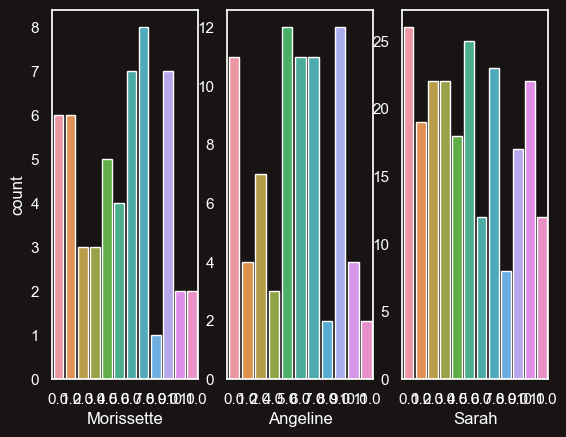

In [47]:
plt.figure(figsize=(4, 3))
fig, ax = plt.subplots(1,3)

sns.countplot(all_artist_data[all_artist_data['artist_name_x']=='Morissette']['key'], ax=ax[0])
sns.countplot(all_artist_data[all_artist_data['artist_name_x']=='Angeline Quinto']['key'], ax=ax[1])
sns.countplot(all_artist_data[all_artist_data['artist_name_x']=='Sarah Geronimo']['key'], ax=ax[2])

ax[0].set(xlabel='Morissette', ylabel='count')
ax[1].set(xlabel='Angeline', ylabel='')
ax[2].set(xlabel='Sarah', ylabel='')

<AxesSubplot:xlabel='key', ylabel='count'>

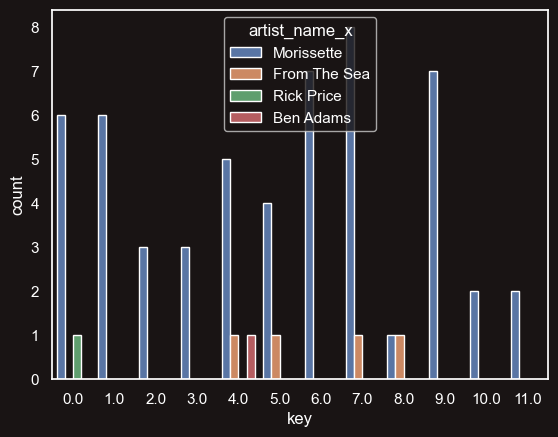

In [48]:
sns.countplot(data = mori_data, x = 'key', hue = 'artist_name_x')

##### **Popularity**

##### by artist

In [50]:
artist_df = pd.read_csv('data/spotify_daily_charts_artists.csv')
artist_df = artist_df[artist_df['artist_name'].isin(singers)]
artist_df.head()

,artist_id,artist_name,total_followers,genres,popularity
69,6aiCKnIN68hohzU3ZzNq48,Sarah Geronimo,3242110,['opm'],56
127,7DW4ijH3n36QN0RlC0n649,Angeline Quinto,553333,['opm'],53
144,62WbvkXqQGvXQvw74GU3kQ,Morissette,1070016,['opm'],54


##### by songs

In [52]:
top_tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
top_tracks_df = top_tracks_df[top_tracks_df['artist_name'].isin(singers)].sort_values('artist_name')
# top_tracks_df

In [53]:
total_streams = top_songs_df.groupby('track_name').sum('streams').sort_values('streams',ascending=False)
# total_streams

In [54]:
top_tracks_df[['track_name', 'artist_name', 'popularity']].merge(total_streams, on = 'track_name', how = 'left')

,track_name,artist_name,popularity,streams
0,Till I Met You,Angeline Quinto,61,6509445
1,Gusto Kita,Angeline Quinto,46,19802
2,Gusto Kita,Angeline Quinto,46,19802
3,Till I Met You,Angeline Quinto,61,6509445
4,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",Morissette,60,19176122
5,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",Morissette,60,19176122
6,"Maybe This Time - From ""Maybe This Time""",Sarah Geronimo,62,25470225
7,Isa Pang Araw,Sarah Geronimo,2,7830746
8,"214 - Recorded at Kodama Studios, Philippines",Sarah Geronimo,0,1233356
9,Isa Pang Araw,Sarah Geronimo,0,7830746


#### Counts

In [55]:
## total number of songs released
total_songs = all_artist_data[all_artist_data['artist_name_x'].isin(singers)].groupby('artist_name_x')['track_name'].count().to_frame().reset_index()
total_songs = total_songs.rename(columns={"track_name": 'all_tracks', "artist_name_x" :'artist_name'})
total_songs

,artist_name,all_tracks
0,Angeline Quinto,79
1,Morissette,54
2,Sarah Geronimo,226


In [56]:
# number of tracks in top 200 charts
total_top = top_tracks_df.groupby('artist_name')['track_name'].count().to_frame().reset_index()
total_top = total_top.rename(columns={"track_name": 'top_tracks'})
total_top

,artist_name,top_tracks
0,Angeline Quinto,4
1,Morissette,2
2,Sarah Geronimo,14


In [57]:
x = total_songs.merge(total_top, on = 'artist_name', how ='left')
x['percent'] = 100*(x['top_tracks']/x['all_tracks'])
x

,artist_name,all_tracks,top_tracks,percent
0,Angeline Quinto,79,4,5.063291
1,Morissette,54,2,3.703704
2,Sarah Geronimo,226,14,6.194690


#### **Genre Comparison**

In [64]:
dance_pop_df = pd.read_csv('data/playlist/dance pop_playlist_tracks_data.csv')
dance_pop_df['genre'] = 'Dance Pop'

rock_df = pd.read_csv('data/playlist/rock_playlist_tracks_data.csv')
rock_df['genre'] = 'Rock'

jazz_df = pd.read_csv('data/playlist/Jazz_playlist_tracks_data.csv')
jazz_df['genre'] = 'Jazz'

rnb_df = pd.read_csv('data/playlist/r&b_playlist_tracks_data.csv')
rnb_df['genre'] = 'R&B'

ballad_df = pd.read_csv('data/playlist/ballad_playlist_tracks_data.csv')
ballad_df['genre'] = 'Ballad'

dance_pop_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,genre
0,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,7M842DMhYVALrXsw3ty7B3,175238,2022-08-26,97,0.561,0.965,...,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,37i9dQZF1DWZQaaqNMbbXa,Dance Pop Hits,Dance Pop
1,4zN21mbAuaD0WqtmaTZZeP,Ferrari,43BxCL6t4c73BQnIJtry5v,James Hype,6moZ4sNThthUAwCklyuPY8,186661,2022-04-01,91,0.847,0.690,...,0,0.0493,0.01270,0.000060,0.0526,0.692,125.004,37i9dQZF1DWZQaaqNMbbXa,Dance Pop Hits,Dance Pop
2,7ef4DlsgrMEH11cDZd32M6,One Kiss (with Dua Lipa),7CajNmpbOovFoOoasH2HaY,Calvin Harris,7GEzhoTiqcPYkOprWQu581,214846,2018-04-06,90,0.791,0.862,...,0,0.1100,0.03700,0.000022,0.0814,0.592,123.994,37i9dQZF1DWZQaaqNMbbXa,Dance Pop Hits,Dance Pop
3,3uUuGVFu1V7jTQL60S1r8z,Where Are You Now,7f5Zgnp2spUuuzKplmRkt7,Lost Frequencies,5YrOK7zze6egKg9a8WRcnD,148197,2021-07-30,89,0.671,0.636,...,0,0.1030,0.51500,0.000411,0.1720,0.262,120.966,37i9dQZF1DWZQaaqNMbbXa,Dance Pop Hits,Dance Pop
4,40SBS57su9xLiE1WqkXOVr,Afraid To Feel,0HxX6imltnNXJyQhu4nsiO,LF SYSTEM,528LrHfHcB7PMAvyp8Obhp,177524,2022-05-02,87,0.578,0.912,...,1,0.1140,0.01660,0.003620,0.2730,0.680,127.870,37i9dQZF1DWZQaaqNMbbXa,Dance Pop Hits,Dance Pop


In [65]:
all_genre_df = pd.concat([dance_pop_df, rock_df, jazz_df, rnb_df, ballad_df])
all_genre_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,genre,Unnamed: 0
0,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,7M842DMhYVALrXsw3ty7B3,175238,2022-08-26,97,0.561,0.965,...,0.0343,0.00383,0.000007,0.3710,0.304,128.040,37i9dQZF1DWZQaaqNMbbXa,Dance Pop Hits,Dance Pop,NaN
1,4zN21mbAuaD0WqtmaTZZeP,Ferrari,43BxCL6t4c73BQnIJtry5v,James Hype,6moZ4sNThthUAwCklyuPY8,186661,2022-04-01,91,0.847,0.690,...,0.0493,0.01270,0.000060,0.0526,0.692,125.004,37i9dQZF1DWZQaaqNMbbXa,Dance Pop Hits,Dance Pop,NaN
2,7ef4DlsgrMEH11cDZd32M6,One Kiss (with Dua Lipa),7CajNmpbOovFoOoasH2HaY,Calvin Harris,7GEzhoTiqcPYkOprWQu581,214846,2018-04-06,90,0.791,0.862,...,0.1100,0.03700,0.000022,0.0814,0.592,123.994,37i9dQZF1DWZQaaqNMbbXa,Dance Pop Hits,Dance Pop,NaN
3,3uUuGVFu1V7jTQL60S1r8z,Where Are You Now,7f5Zgnp2spUuuzKplmRkt7,Lost Frequencies,5YrOK7zze6egKg9a8WRcnD,148197,2021-07-30,89,0.671,0.636,...,0.1030,0.51500,0.000411,0.1720,0.262,120.966,37i9dQZF1DWZQaaqNMbbXa,Dance Pop Hits,Dance Pop,NaN
4,40SBS57su9xLiE1WqkXOVr,Afraid To Feel,0HxX6imltnNXJyQhu4nsiO,LF SYSTEM,528LrHfHcB7PMAvyp8Obhp,177524,2022-05-02,87,0.578,0.912,...,0.1140,0.01660,0.003620,0.2730,0.680,127.870,37i9dQZF1DWZQaaqNMbbXa,Dance Pop Hits,Dance Pop,NaN


In [66]:

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']

columns_to_view = ['genre', 'track_name'] + features

In [67]:
df_features = all_genre_df[columns_to_view].copy()

# df_features['is_mori'] = ['Morissette' if artist_name in artist else 'Competitors'
#                        for artist_name in df_features['artist'].values]

# get max value for normalization
max_tempo = df_features['tempo'].max()
max_loudness = df_features['loudness'].min()

# normalize tempo and loudness
df_features['tempo']= df_features['tempo']/max_tempo
df_features['loudness']= df_features['loudness']/max_loudness

# set multiindex
df_features = df_features.set_index(['track_name', 'genre'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
# # reset index
df_features_stacked = df_features_stacked.reset_index()
# # rename level_3
df_features_stacked = df_features_stacked.rename(columns={'level_2': 'feature'})
df_features_stacked

,track_name,genre,feature,value
0,I'm Good (Blue),Dance Pop,danceability,0.561000
1,I'm Good (Blue),Dance Pop,energy,0.965000
2,I'm Good (Blue),Dance Pop,loudness,0.094392
3,I'm Good (Blue),Dance Pop,speechiness,0.034300
4,I'm Good (Blue),Dance Pop,acousticness,0.003830
...,...,...,...,...
81040,Total Eclipse of the Heart,Ballad,acousticness,0.205000
81041,Total Eclipse of the Heart,Ballad,instrumentalness,0.000000
81042,Total Eclipse of the Heart,Ballad,liveness,0.119000
81043,Total Eclipse of the Heart,Ballad,valence,0.113000


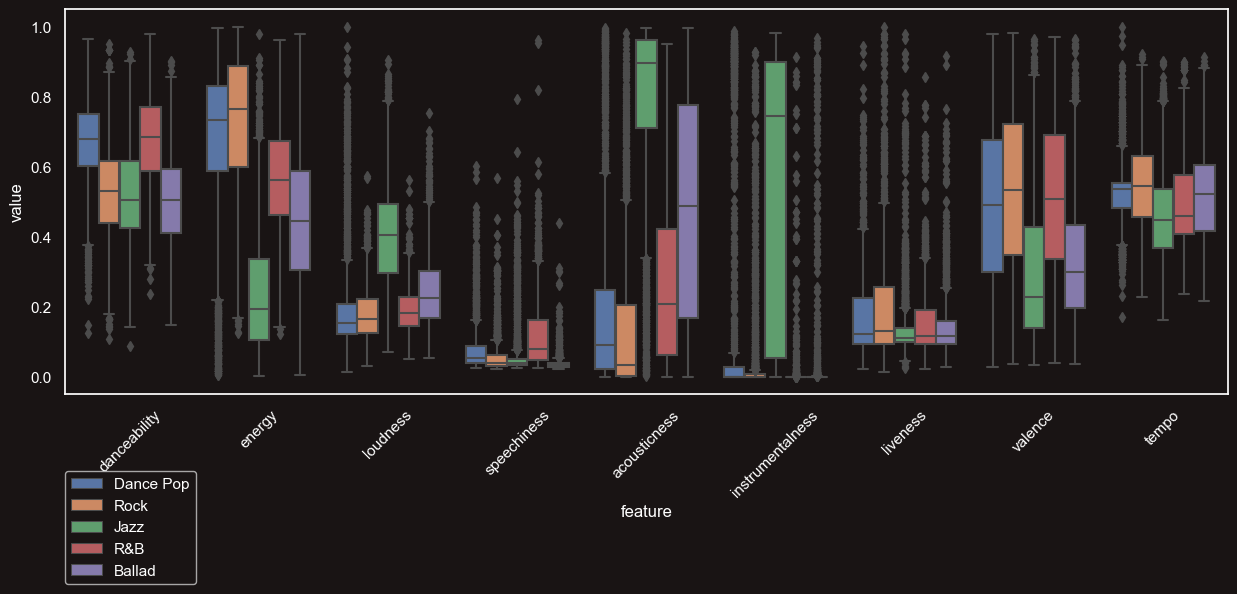

In [68]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y='value',  hue='genre', ax=ax)#,
            # hue_order=['Morissette', 'Competitors'], palette=['pink', 'C7'])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0)

In [69]:
df_features_stacked[df_features_stacked['feature'] == 'danceability']

,track_name,genre,feature,value
0,I'm Good (Blue),Dance Pop,danceability,0.561
9,Ferrari,Dance Pop,danceability,0.847
18,One Kiss (with Dua Lipa),Dance Pop,danceability,0.791
27,Where Are You Now,Dance Pop,danceability,0.671
36,Afraid To Feel,Dance Pop,danceability,0.578
...,...,...,...,...
81000,"Hotel California - Live On MTV, 1994",Ballad,danceability,0.672
81009,You Were Always on My Mind,Ballad,danceability,0.348
81018,Torn,Ballad,danceability,0.576
81027,Careless Whisper,Ballad,danceability,0.574


<Figure size 400x300 with 0 Axes>

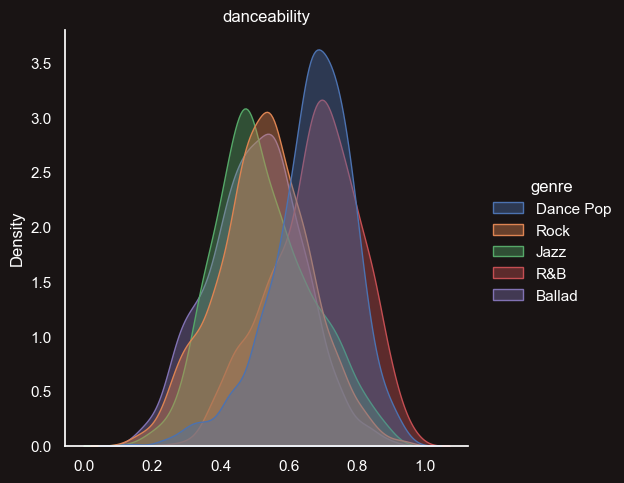

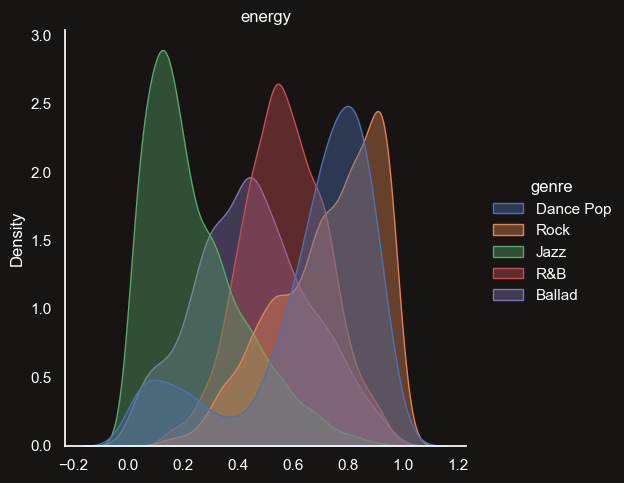

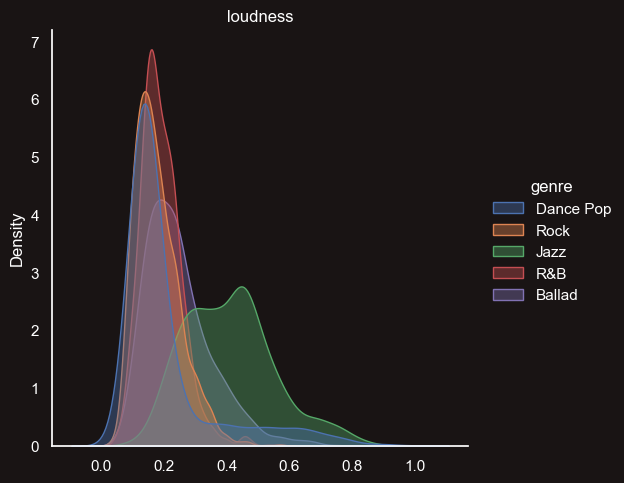

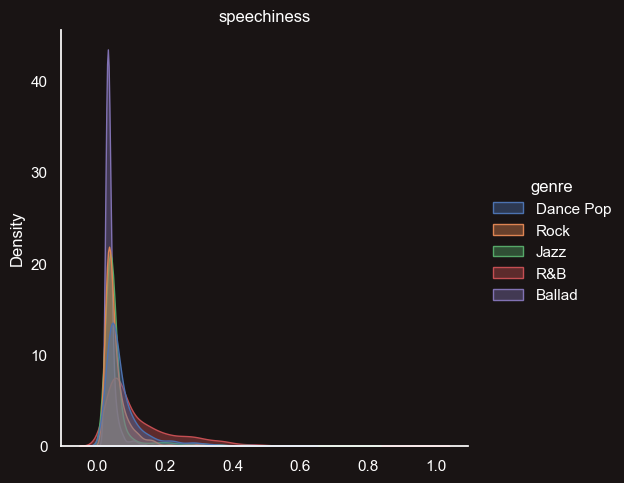

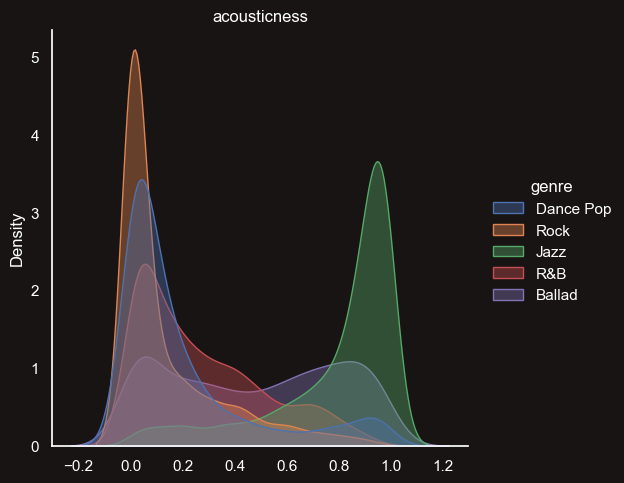

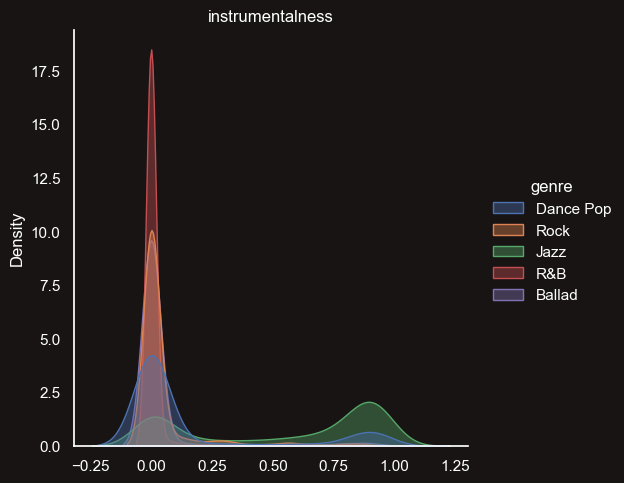

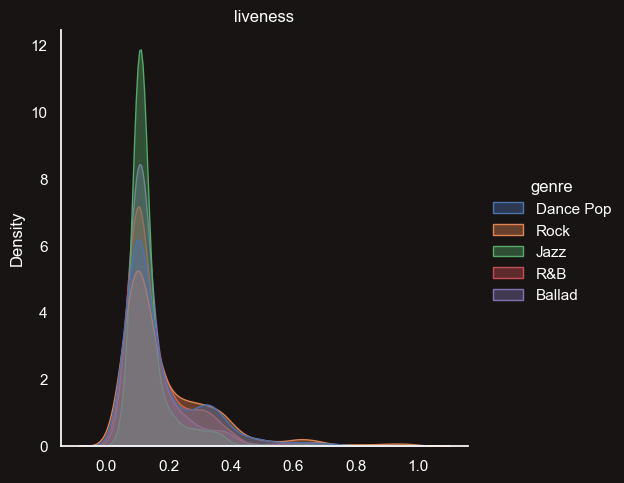

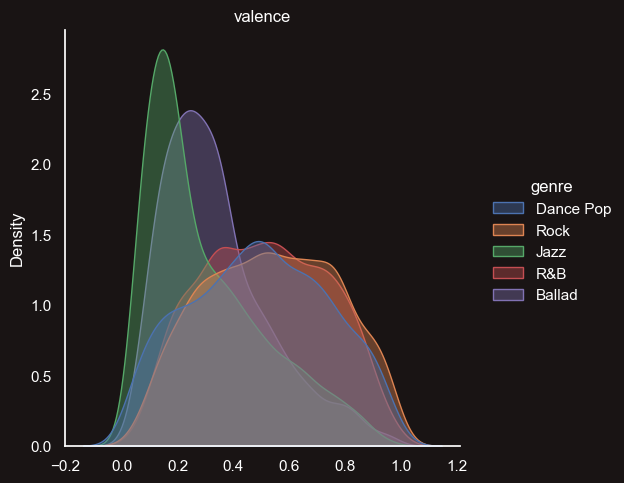

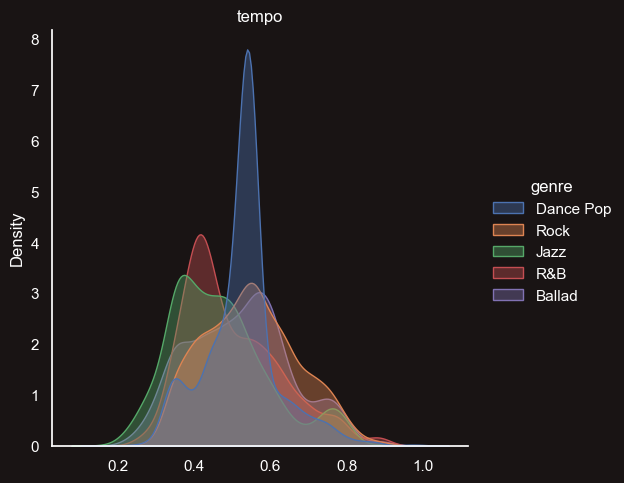

In [70]:
plt.figure(figsize=(4, 3))
# fig, ax = plt.subplots(3,3)

# With transparency
for nm in features:
    sns.displot(data=df_features_stacked[df_features_stacked['feature'] == nm], x='value',  
    hue='genre', fill=True, common_norm=False, alpha=0.4,
    kind = 'kde').set(title = nm, xlabel = '')
